In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import california housing dataset
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing()

In [3]:
cal_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
#describe the dataset
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
# convert the dataset into pandas dataframe
df = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
df['Price'] = cal_housing.target

## EDA

In [7]:
# exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Data Preprocessing

In [9]:
# check for missing values
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

<Axes: xlabel='MedInc'>

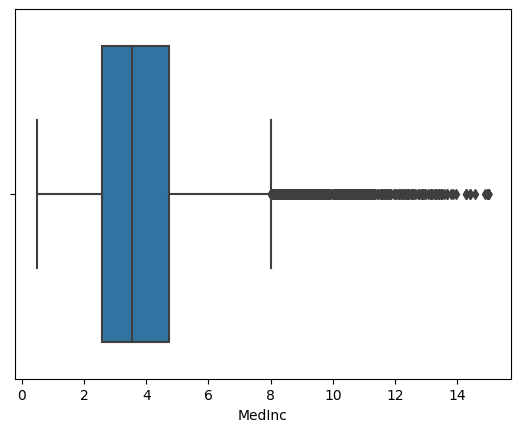

In [10]:
# check for outliers
sns.boxplot(x=df['MedInc'])

In [13]:
# check for correlation
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

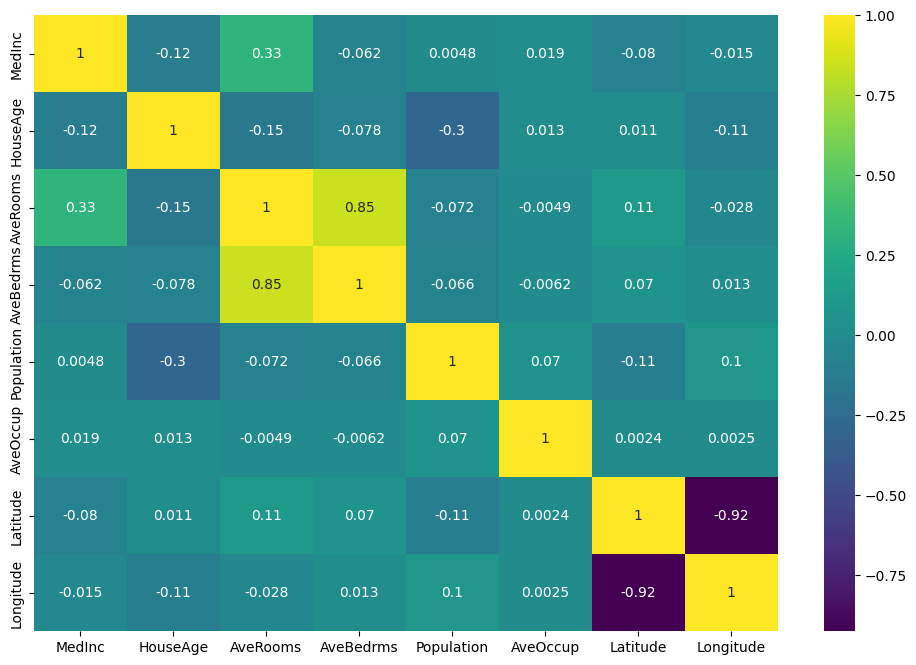

In [19]:
# plot the correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap = 'viridis')

<Axes: xlabel='MedInc', ylabel='Price'>

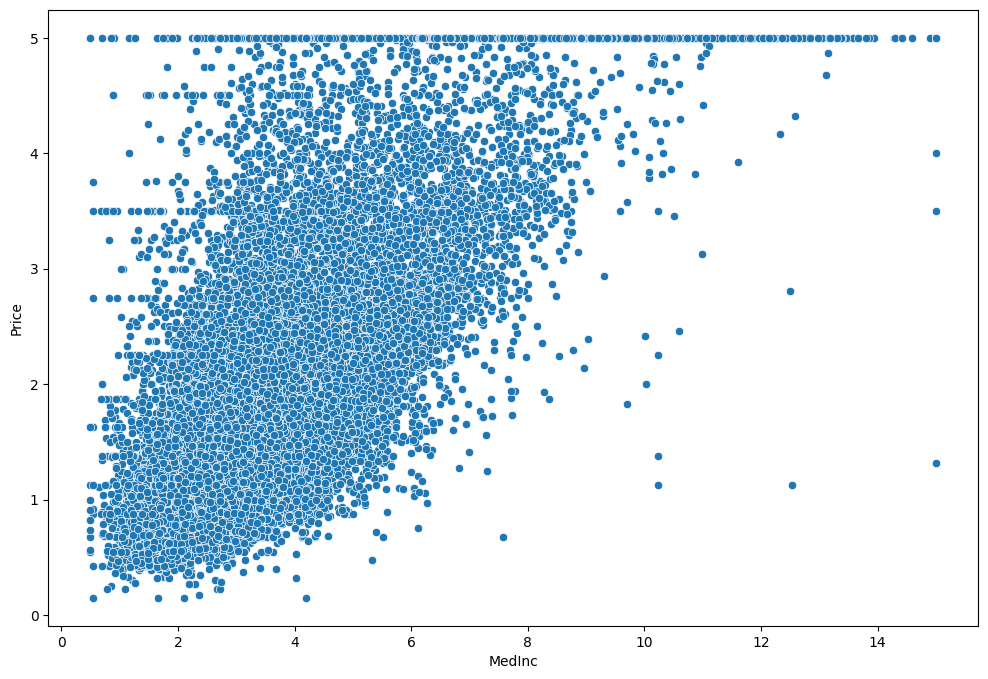

In [23]:
# scatter plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='MedInc', y='Price', data=df)

In [24]:
# prepare the data for training
X = df.drop('Price', axis=1)
y = df['Price']

In [25]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
# Standardized the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [27]:
# scale the training data
X_train = scalar.fit_transform(X_train)

# scale the testing data
X_test = scalar.transform(X_test)

### Pickling the scalar

In [28]:
import pickle

In [29]:
# pickle the scalar
pickle.dump(scalar, open('scalar.pkl', 'wb'))

## Training the model

In [30]:
# create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [31]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# coefficient of model
print(model.coef_)

[ 0.82805633  0.13017978 -0.24922406  0.27560562  0.00729792 -0.09030873
 -0.87842543 -0.84391985]


In [41]:
print(model.intercept_)

2.065099844961244


In [42]:
# parameters of the model
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


## Preiction

In [33]:
# predict the model on test data
predictions = model.predict(X_test)

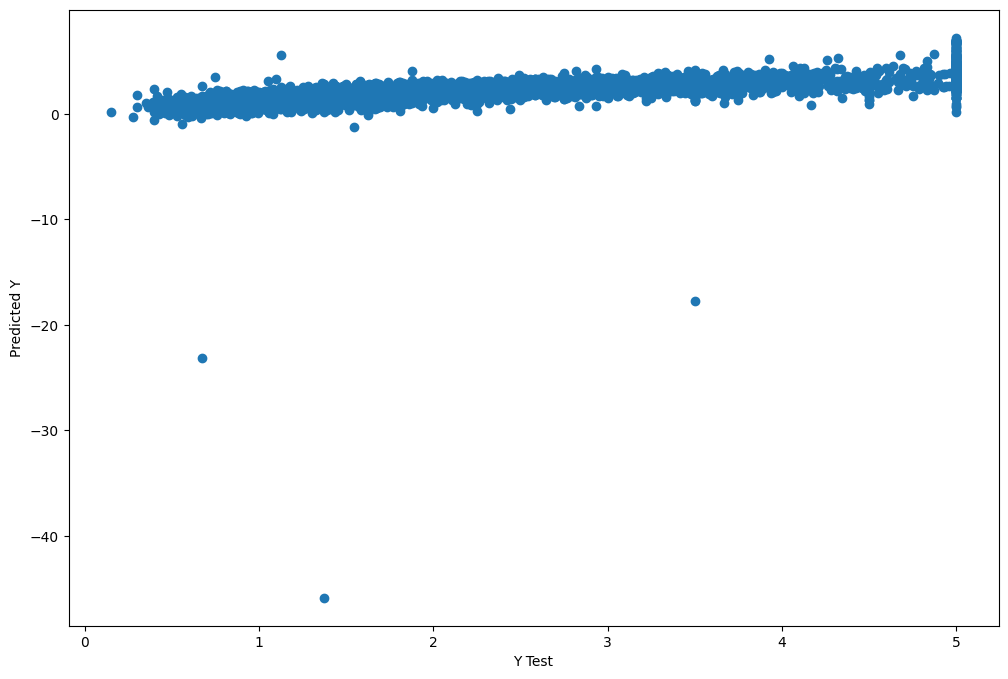

In [43]:
# plot the predictions
plt.figure(figsize=(12,8))
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Residuals are the difference between the actual value and the predicted value. The residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate. If there is a structure in the residual plot, that means that the model is not capturing some information in the data. In this case, we can try to transform the data to capture the information.
It is given as follows: 
$$\text{Residuals} = \text{Actual value} - \text{Predicted value}$$

Residuals are a measure of how far from the regression line data points are; i.e. the difference between the observed value of the dependent variable (y) and the predicted value (ŷ). In other words, it is the error of the prediction. The residual is given as
$$e = y - \hat{y}$$


In [45]:
residuals = y_test - predictions

C:\Users\qtanw\AppData\Local\Temp\ipykernel_9868\444484197.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=50)


<Axes: xlabel='Price', ylabel='Density'>

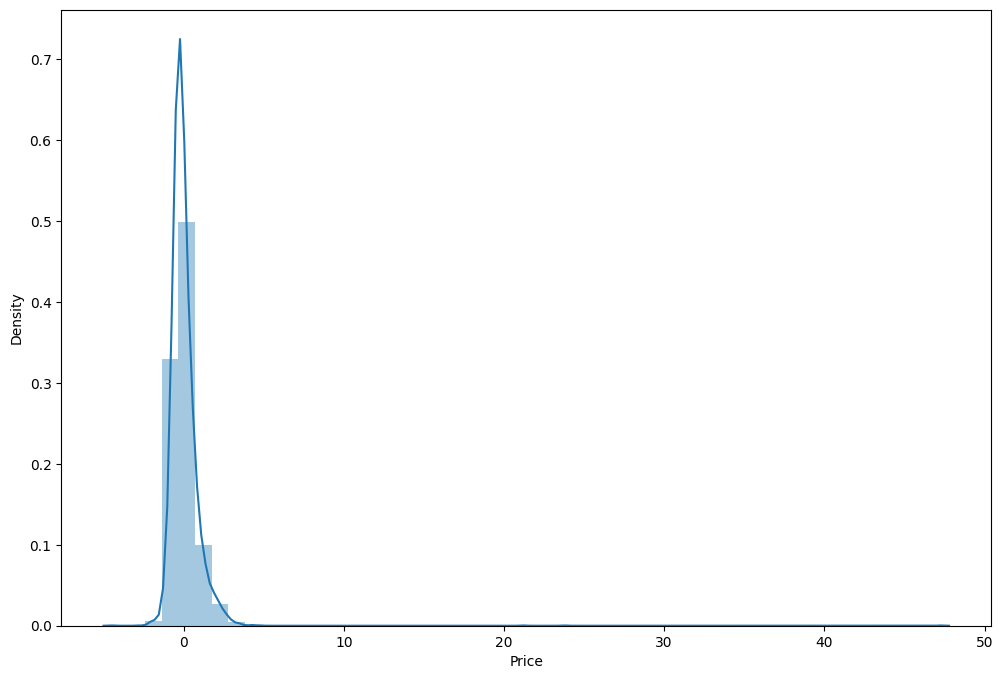

In [46]:
# plot the residuals
plt.figure(figsize=(12,8))
sns.distplot(residuals, bins=50)

## Evaluation and Model Improvement

In [34]:
# evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))


MAE:  0.5447635351616545
MSE:  1.0560037436551122
RMSE:  1.0276204278113161


We will also test the model on R squared and Adjusted R squared. The R squared is the percentage of the variance in the dependent variable that is predictable from the independent variable. It is a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.
It is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. It is given as 
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
where $SS_{res}$ is the sum of squares of residuals and $SS_{tot}$ is the total sum of squares.

The Adjusted R squared is the R squared adjusted for the number of predictors in the model. The Adjusted R squared penalizes the model for having too many predictors. It is given as
$$R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$
where $n$ is the number of observations and $p$ is the number of predictors.

In [35]:
# R2 score and adjusted R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print('R2 score: ', r2)
adjusted_r2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R2 score: ', adjusted_r2)

R2 score:  0.2196454571436709
Adjusted R2 score:  0.21934286219709298


## Prediction on new data

In [47]:
## Predict the price of a house
# create a function to predict the price of a house
def predict_price(MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude):
    x = np.zeros(len(X.columns))
    x[0] = MedInc
    x[1] = HouseAge
    x[2] = AveRooms
    x[3] = AveBedrms
    x[4] = Population
    x[5] = AveOccup
    x[6] = Latitude
    x[7] = Longitude
    x = scalar.transform([x])[0]
    return model.predict([x])[0]

# predict the price of a house
predict_price(8.3252, 41, 6.984126984126984, 1.0238095238095237, 322.0, 2.5555555555555554, 37.88, -122.23)

d:\Projects\California_Housing\calHousing\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


4.149035243867415

# Pickling the model

In [48]:
# pickle the model
pickle.dump(model, open('model.pkl', 'wb'))

In [49]:
# load the pickled model
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [51]:
# prediction from the pickled model
pickled_model.predict(np.array([8.3252, 41, 6.984126984126984, 1.0238095238095237, 322.0, 2.5555555555555554, 37.88, -122.23]).reshape(1, -1))

array([84.83447129])